<center><img src="dow_jones_2.JPG"/></center>
    
<center><h1>Behind the Numbers</h1></center>
<center><h4>Insights into the Interplay of Corporate Giants in the Dow Jones Industrial Average Stock Market Index</h4></center>
    
***

#### Introduction:

The Dow Jones Industrial Average (DJIA) has a long-standing history as one of the most iconic and influential stock market indices globally. Comprising 30 leading companies in the United States, the DJIA serves as a barometer for the overall health and performance of the American economy. However, beyond its role as a mere numerical representation of stock prices, the DJIA holds a captivating story waiting to be unraveled through the lens of network analysis. By leveraging the power of NetworkX, a Python library for network analysis, we aim to shed light on the intricate relationships and dynamics that shape the world of finance.

#### Understanding Network Analysis and NetworkX

Network analysis has emerged as a powerful approach to study relationships and connections within complex systems. Whether analyzing social networks, biological interactions, transportation systems, or financial markets, the principles of network analysis have proven remarkably applicable in diverse real-world phenomena. At its core, a network comprises nodes representing individual entities and edges signifying the connections between these entities. This enables us to visualize the intricate web of interactions, identify key players, and understand the system's overall structure and dynamics. To explore the captivating world of network analysis in the context of the DJIA, we rely on NetworkX, a versatile Python library that simplifies working with networks. NetworkX equips us with a wealth of functions and algorithms to calculate essential network properties and metrics, providing deep insights into the underlying relationships and behaviors of the DJIA bipartite network. By leveraging NetworkX's capabilities, we can extract meaningful information from the vast dataset of the DJIA's 30 major companies and their connections and uncover patterns that shape the financial landscape. Together, we embark on a journey of exploration and learning, unraveling the intricate interplay among these corporate giants and gaining new perspectives on the dynamics that drive the performance of the stock market. To read more about networkX, visit the documentation [here](https://networkx.org/documentation/latest/)

#### Unveiling Financial Insights with yfinance

To dive into the heart of the financial world, we turn to yfinance, a powerful Python library that grants us seamless access to crucial financial data from Yahoo Finance. Recognizing the profound significance of financial data in analyzing stock market behavior and investment patterns, we now have the means to explore the rich features and capabilities of yfinance. With this invaluable data at our disposal, we set the stage for conducting comprehensive financial network analysis on the DJIA companies.

yfinance serves as a bridge between us and the vast repository of financial information available on Yahoo Finance. Through its user-friendly interface and straightforward API, we can effortlessly retrieve company information and other key data points for the companies in the DJIA index. This enables us to gain deep insights into the historical performance and behavior of these major corporations, crucial for understanding their roles within the DJIA network. Read the documentation of yfinance [here](https://pypi.org/project/yfinance/)!

In [2]:
# Imported libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import networkx as nx
import pandas as pd
from networkx.algorithms import bipartite
import yfinance as yf

warnings.filterwarnings("ignore")
%matplotlib inline

#### Sample Ticker

Ticker symbols play a critical role in the world of finance and investment as easily recognizable shorthand codes assigned to individual companies publicly traded on stock exchanges. These short and distinct identifiers are carefully designed to make it convenient for investors, traders, and the general public to refer to and track the performance of specific companies in the dynamic stock market environment.

When a company undergoes an initial public offering (IPO) and becomes listed on a stock exchange, it is allocated a unique ticker symbol. This symbol typically comprises a combination of letters, and in some cases, numbers, representing the company's name or a shortened version thereof. By condensing a company's identity into a succinct code, ticker symbols facilitate efficient and rapid communication, enabling market participants to stay informed without the need for lengthy company names.

In [3]:
sample_ticker = yf.Ticker('AAPL')
ticker_df = sample_ticker.institutional_holders
ticker_df['Company'] = sample_ticker.ticker
display(ticker_df)

,Holder,Shares,Date Reported,% Out,Value,Company
0,Vanguard Group Inc,1309878888,2023-03-30,0.0833,253094800338,AAPL
1,Blackrock Inc.,1035008939,2023-03-30,0.0658,199984428457,AAPL
2,"Berkshire Hathaway, Inc",915560382,2023-03-30,0.0582,176904578127,AAPL
3,State Street Corporation,576281774,2023-03-30,0.0366,111349165075,AAPL
4,"FMR, LLC",311437576,2023-03-30,0.0198,60175968814,AAPL
5,"Geode Capital Management, LLC",285171112,2023-03-30,0.0181,55100762608,AAPL
6,Price (T.Rowe) Associates Inc,234017381,2023-03-30,0.0149,45216838642,AAPL
7,Morgan Stanley,200615893,2023-03-30,0.0128,38763003090,AAPL
8,Northern Trust Corporation,173130542,2023-03-30,0.0110,33452283536,AAPL
9,Norges Bank Investment Management,167374278,2022-12-30,0.0106,32340058199,AAPL


We use Apple as the sample, and here we can see the top 10 share holders in the Holder column. We also included the Company column, which will be used as a reference once we create a connection between companies and holders.

#### Collecting Data: Dow Jones Industrial Average

To gather the data for all companies under the Dow Jones Industrial Average market index, we are going to use the DJIA component companies table from [wikipedia](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average) as reference. We will be looping through all the symbols and concatenate them to create a final dataframe.

In [4]:
ticker_list = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]['Symbol'].to_list()

frames = []

for ticker in ticker_list:
    var = yf.Ticker(ticker)
    frame = var.institutional_holders
    if var.ticker is not None:
        frame['Company'] = var.ticker
        frames.append(frame)
        
fin_df = pd.concat(frames)
display(fin_df.head(20))

,Holder,Shares,Date Reported,% Out,Value,Company
0,Vanguard Group Inc,48333518,2023-03-30,0.0876,5374203984,MMM
1,Blackrock Inc.,40060873,2023-03-30,0.0726,4454368566,MMM
2,State Street Corporation,33115509,2023-03-30,0.0600,3682113526,MMM
3,"Charles Schwab Investment Management, Inc.",12534832,2023-03-30,0.0227,1393748000,MMM
4,"Geode Capital Management, LLC",11474791,2023-03-30,0.0208,1275882039,MMM
5,Morgan Stanley,10137164,2023-03-30,0.0184,1127151289,MMM
6,State Farm Mutual Automobile Insurance Co,9557100,2023-03-30,0.0173,1062653972,MMM
7,Flossbach von Storch AG,9344091,2023-03-30,0.0169,1038969501,MMM
8,Newport Trust Co,8783781,2023-03-30,0.0159,976668630,MMM
9,Northern Trust Corporation,7312526,2023-03-30,0.0133,813079783,MMM


#### Creation of the Bipartite Network

We will now be initializing our bipartite network by using the holders and the companies as the two bipartite sets.

In [5]:
B = nx.Graph()

holders = fin_df['Holder'].unique()
B.add_nodes_from(holders, bipartite=0)

comps = fin_df['Company'].unique()
B.add_nodes_from(comps, bipartite=1)

edges = [(row['Holder'], row['Company']) for _, row in fin_df.iterrows()]
B.add_edges_from(edges)

print(f'The total number of nodes: {len(B.nodes())}')
print(f'The total number of edges: {len(B.edges())}')

The total number of nodes: 74
The total number of edges: 300


Our network is comprised of 74 nodes and 300 edges. From here we can start visualizing the network.

In [6]:
def plot_bipartite(G):
    node_shapes = {0: "o",
                   1: "s"}

    pos = nx.fruchterman_reingold_layout(G);

    plt.figure(figsize=(30,20))

    node_type = nx.get_node_attributes(G, "bipartite")
    holder_nodes = [node for node in G.nodes if node_type[node] == 0]
    comp_nodes = [node for node in G.nodes if node_type[node] == 1]

    nx.draw_networkx_nodes(G, pos,
                           nodelist=holder_nodes,
                           node_color="skyblue",
                           node_shape="s",
                           node_size=500,
                           alpha=0.8)

    nx.draw_networkx_nodes(G, pos,
                           nodelist=comp_nodes,
                           node_color="lightcoral",
                           node_shape="o",
                           node_size=500,
                           alpha=0.8)

    nx.draw_networkx_edges(G, pos,
                           width=1.0,
                           alpha=0.5,
                           edge_color="gray")

    nx.draw_networkx_labels(G, pos)
    
    plt.axis("off")
    plt.tight_layout()
    plt.show()

#### The Bipartite Network

A bipartite network is a type of graph where the nodes can be divided into two distinct sets, and connections (edges) only exist between nodes from different sets. In the context of your project with the Dow Jones Industrial Average (DJIA) component companies and their holders, a bipartite network represents the relationships between two types of entities: the DJIA component companies and the investors (holders) who own shares in these companies.

In this bipartite network, each node in one set represents a DJIA component company, and each node in the other set represents an investor who holds shares in one or more of these companies. Edges (connections) only exist between investors and the companies they have invested in, making it a bipartite network. This type of representation is particularly useful when analyzing relationships between two distinct classes of entities, such as companies and their shareholders in the stock market context. For more information about bipartite networks, visit [this](https://en.wikipedia.org/wiki/Bipartite_graph).

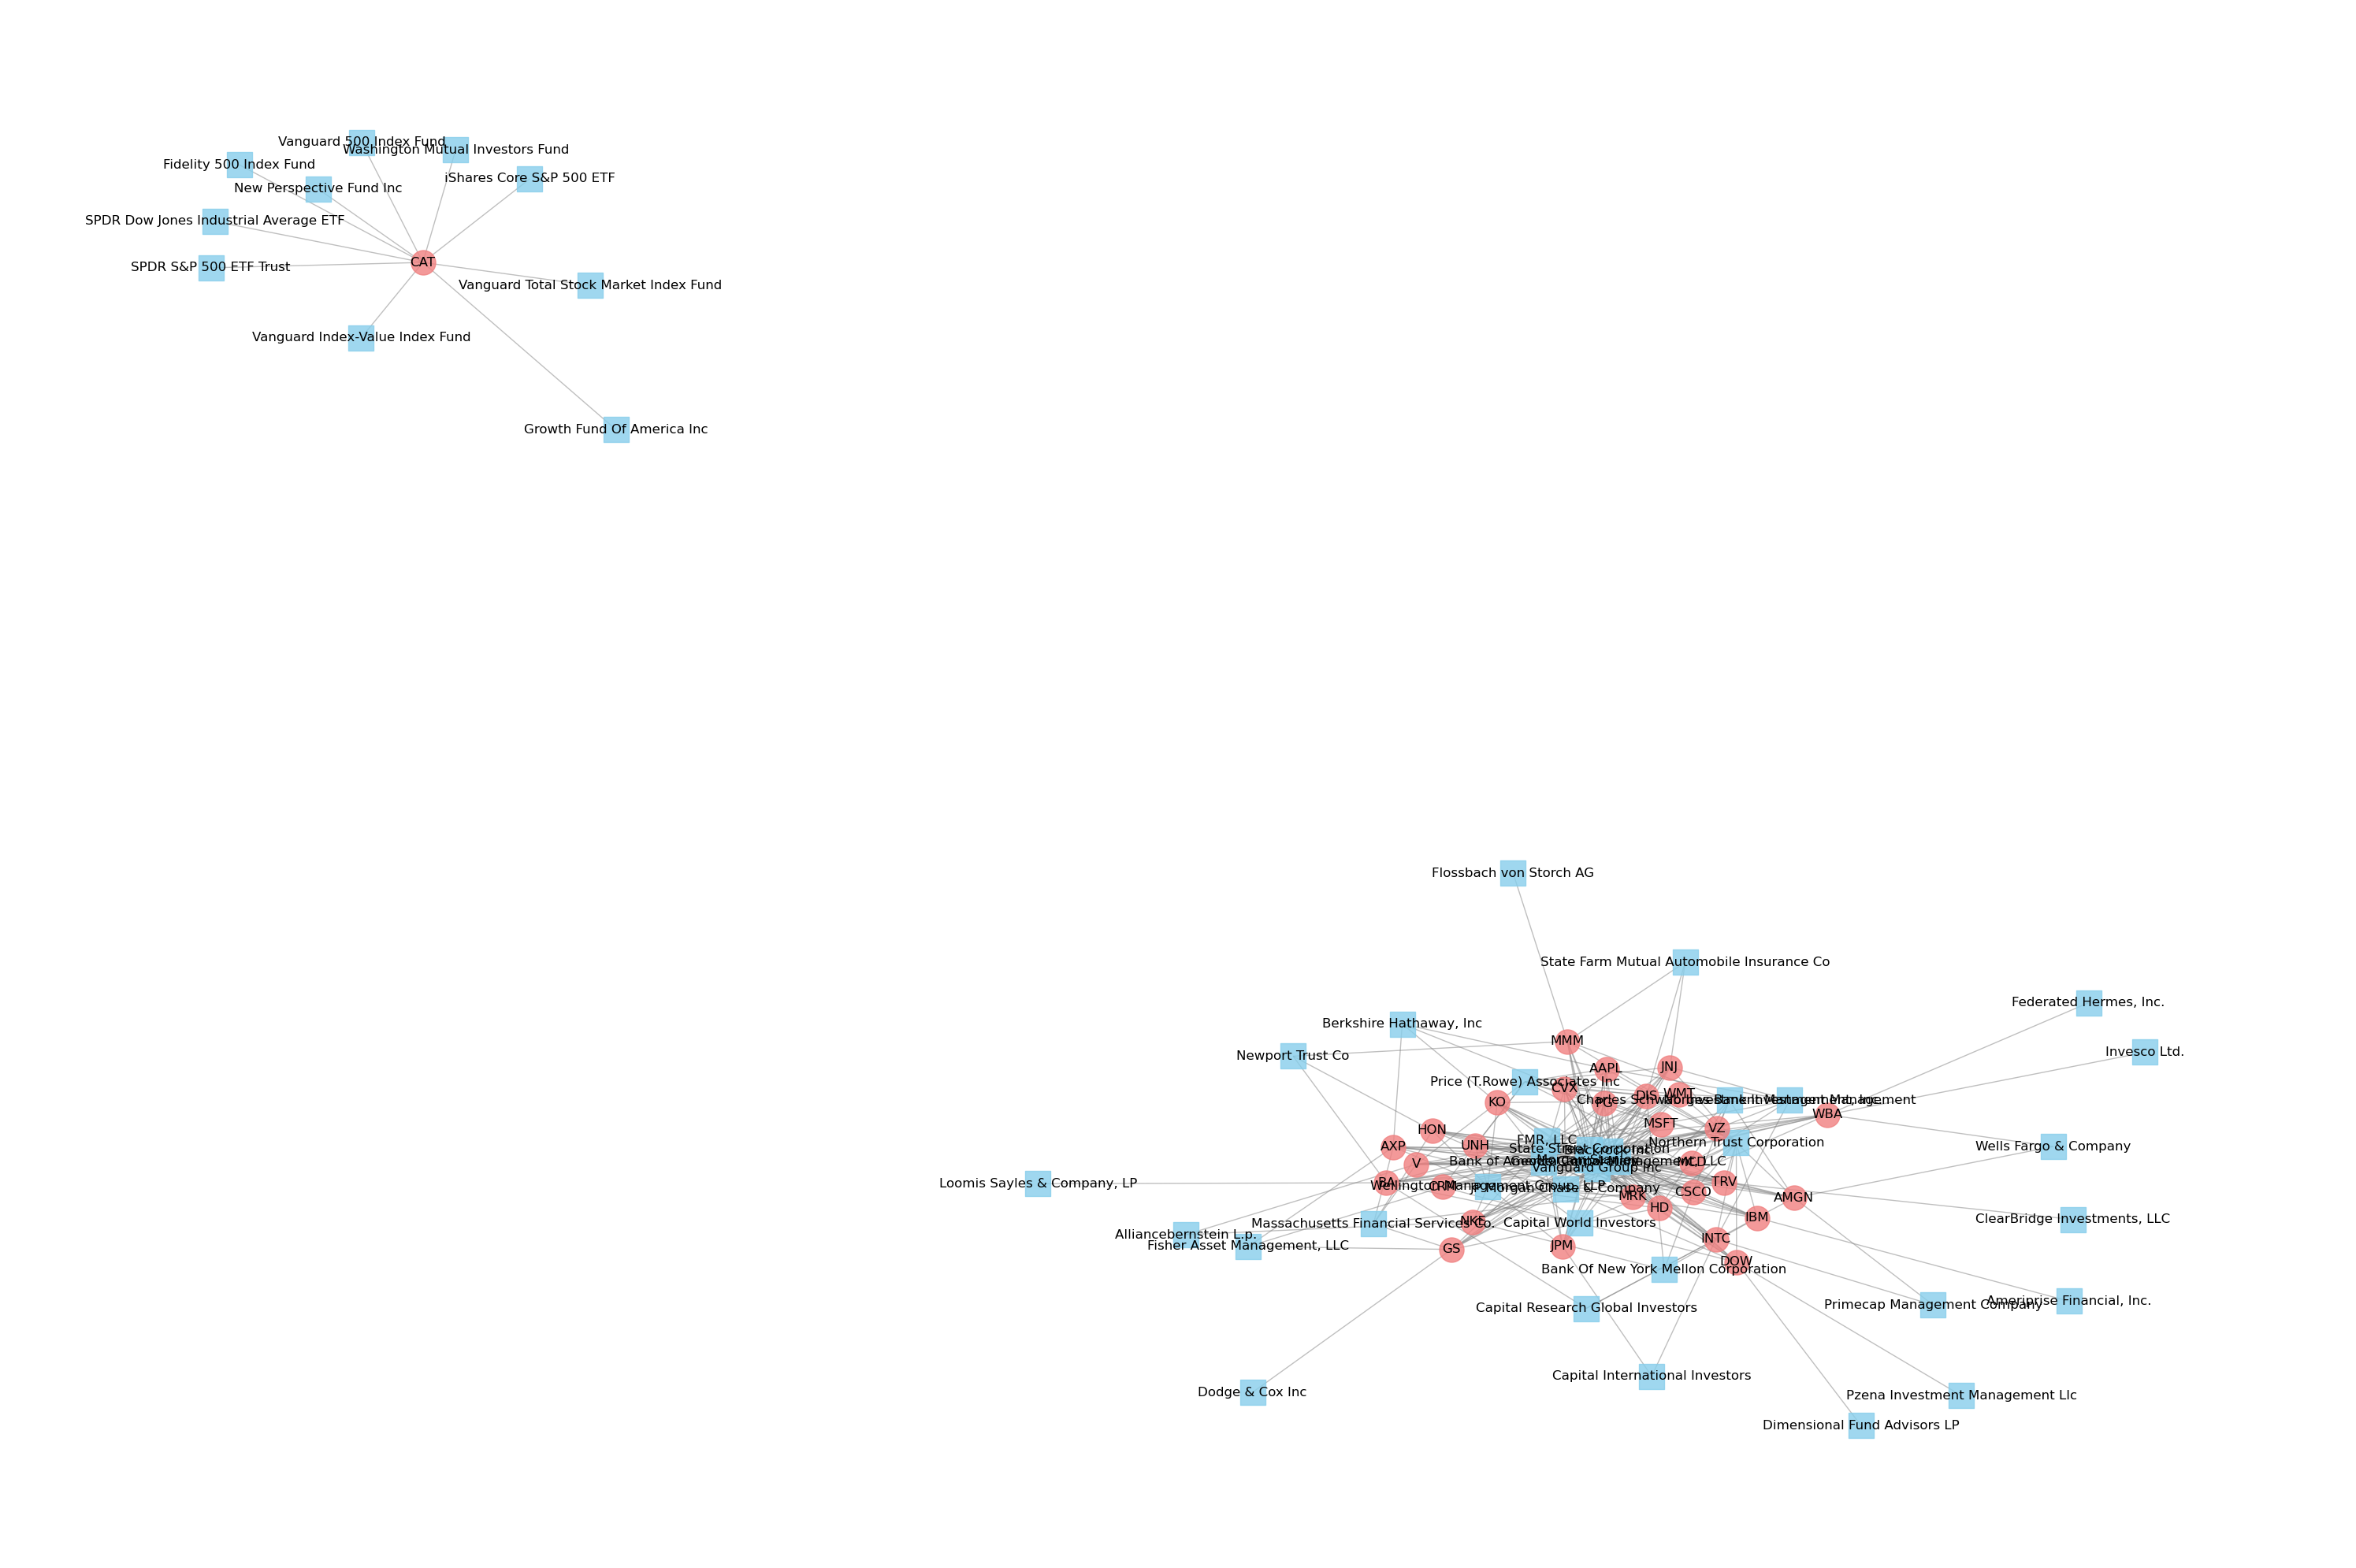

In [7]:
plot_bipartite(B)

In [8]:
nx.is_connected(B)

False

We can observe that that the entire network is not connected and for further analysis, we are going to focus on the larger connected components.

In [9]:
connected_components = list(nx.connected_components(B))
largest_component = max(connected_components, key=len)
B_connected = B.subgraph(largest_component)

print(f'The total number of nodes: {len(B_connected.nodes())}')
print(f'The total number of edges: {len(B_connected.edges())}')

The total number of nodes: 63
The total number of edges: 290


We reduced the number of holders from 70 to 63 and edges from 300  to 290. We can now again visualize the largest connected network.

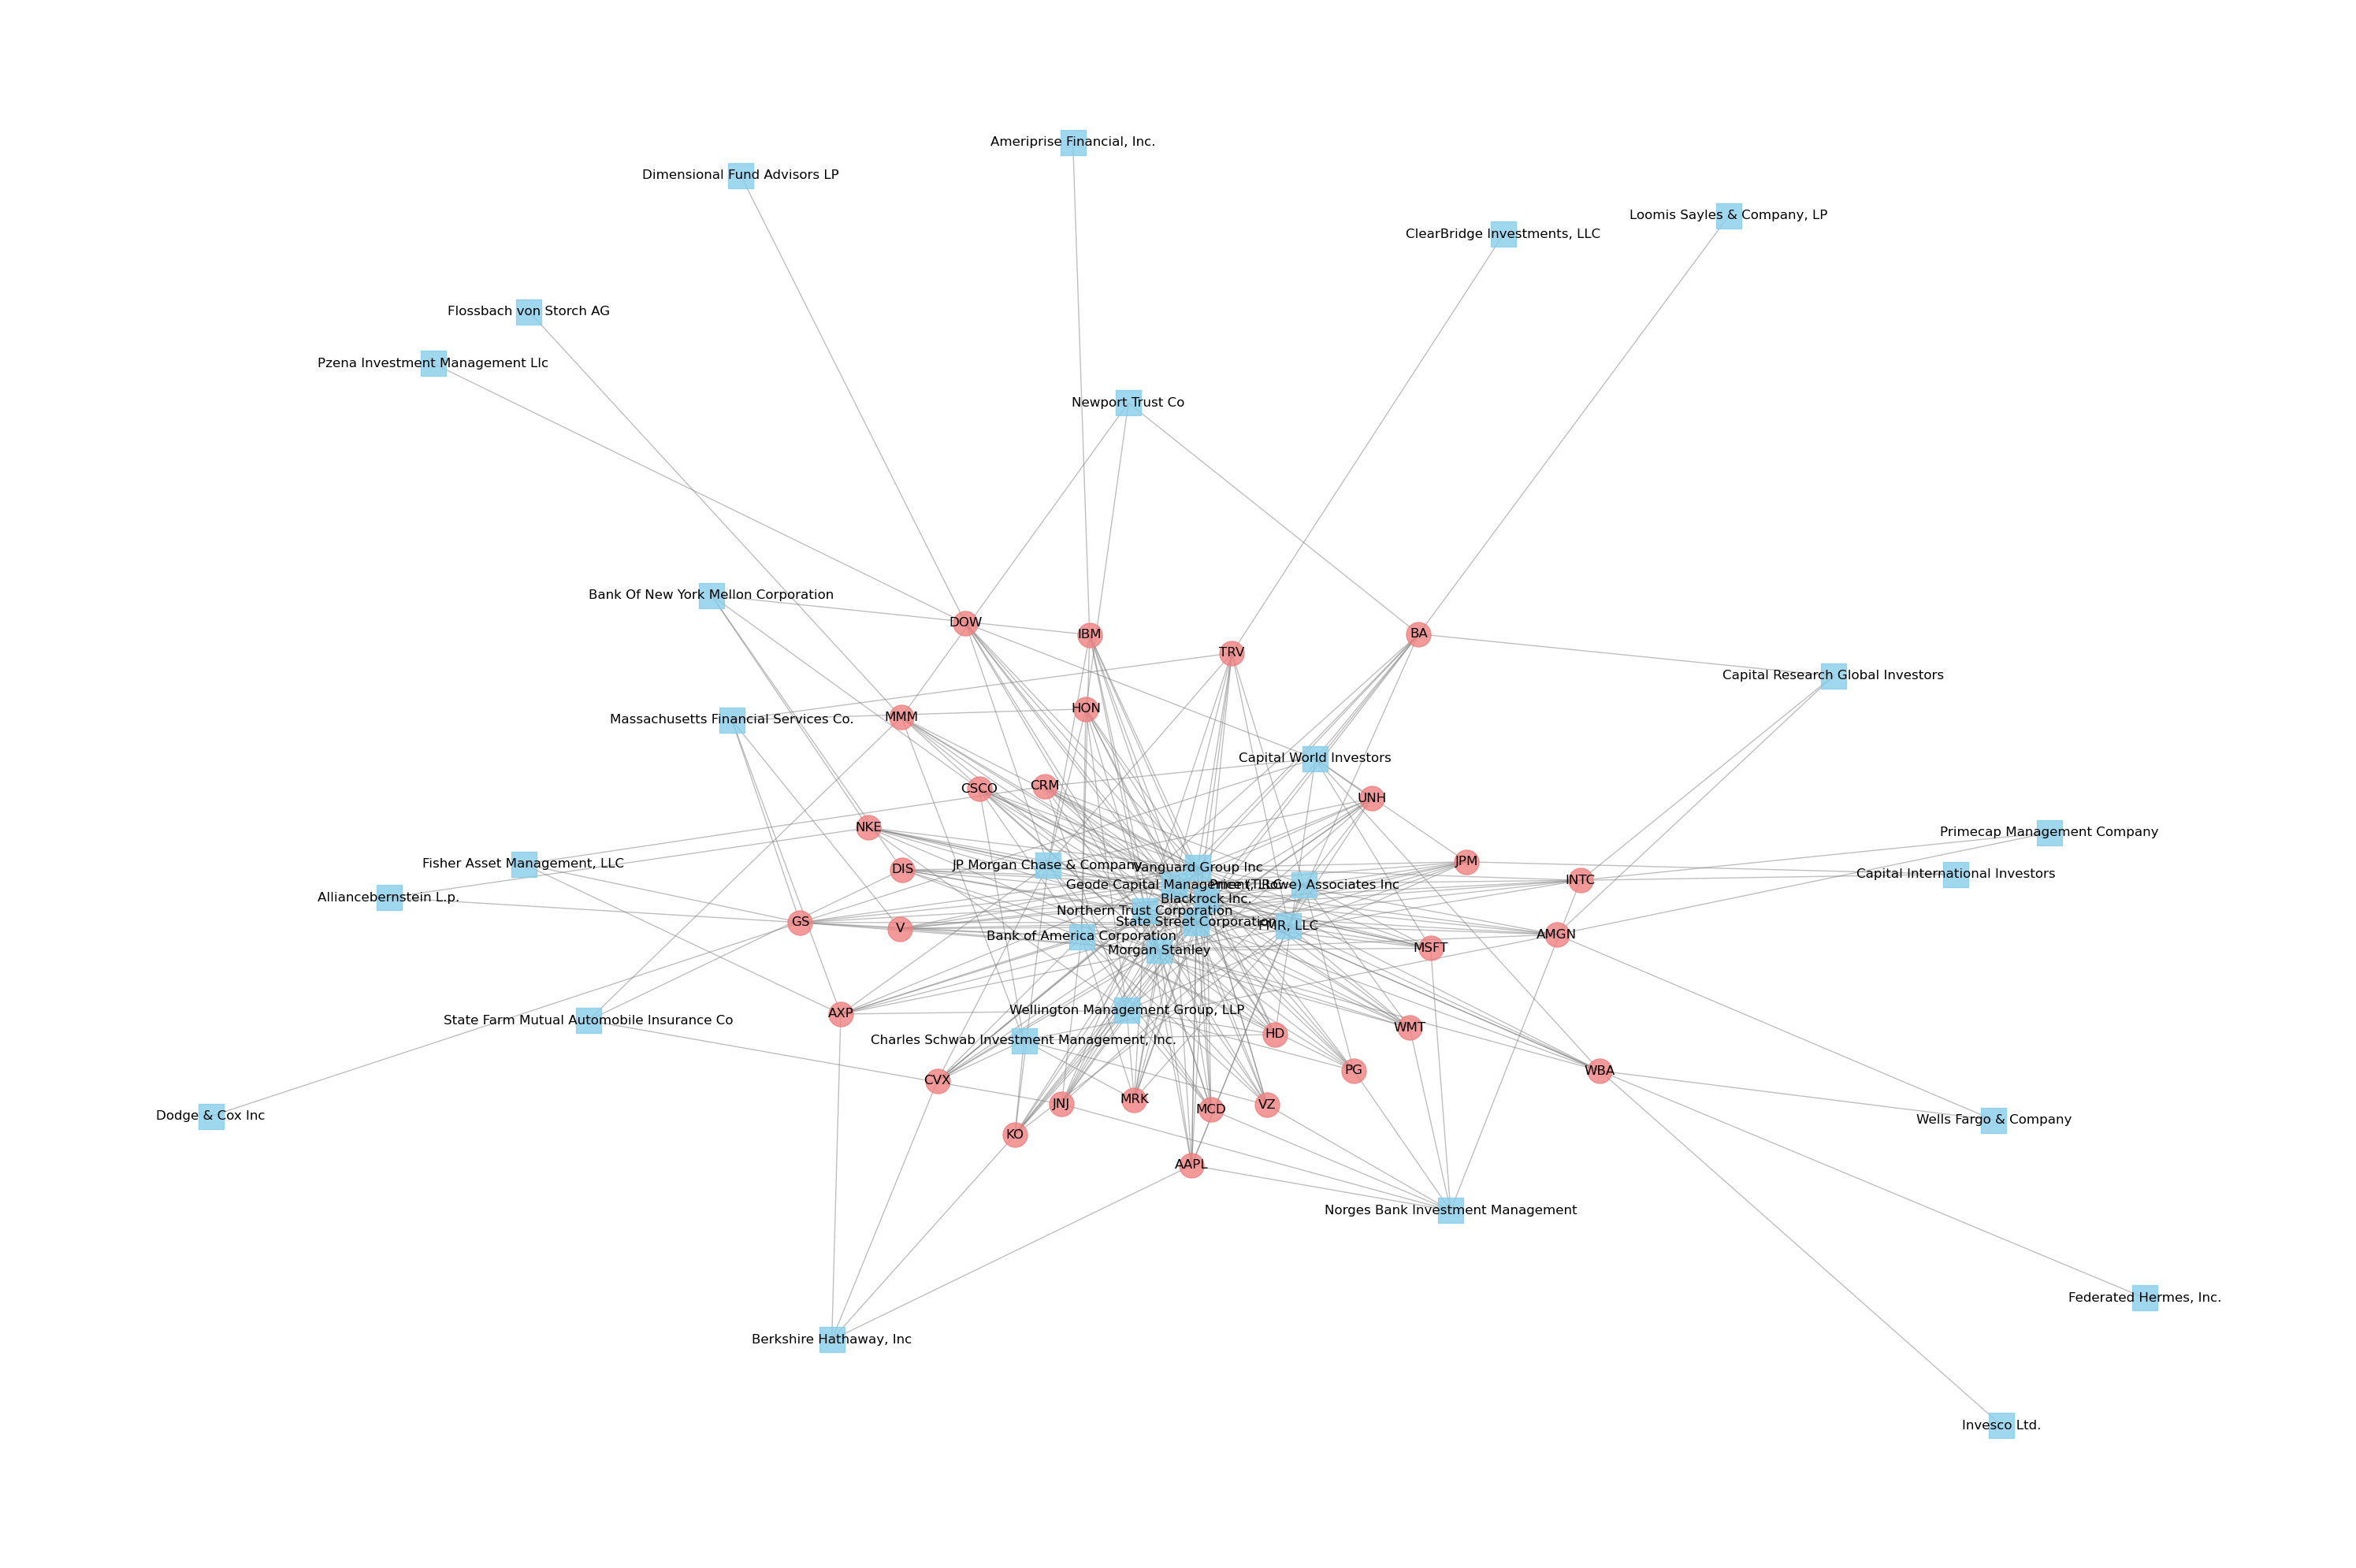

In [10]:
plot_bipartite(B_connected)

In [11]:
degrees_B_connected = [k for node, k in nx.degree(B_connected)]
print(degrees_B_connected)

k_min_B_connected = np.min(degrees_B_connected)
k_max_B_connected = np.max(degrees_B_connected)
k_avg_B_connected = np.mean(degrees_B_connected)

print ('Minimum degree: ', k_min_B_connected)
print ('Maximum degree: ', k_max_B_connected)
print ('Average degree: ', k_avg_B_connected)

[29, 29, 29, 8, 28, 27, 3, 1, 3, 17, 4, 11, 12, 3, 17, 5, 2, 3, 2, 14, 10, 8, 9, 1, 4, 1, 1, 1, 1, 2, 2, 1, 1, 1, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
Minimum degree:  1
Maximum degree:  29
Average degree:  9.206349206349206


For holders, the average degree represents the average number of investments they have in the DJIA component companies. A higher average degree for holders implies that, on average, they hold investments in a greater number of DJIA component companies, indicating a more diversified investment portfolio. This diversification allows holders to spread their investments across multiple companies within the index, potentially reducing risks associated with individual companies.

On the other hand, for companies, the average degree signifies the average number of unique holders that have invested in them within the DJIA network. A higher average degree for companies indicates that, on average, they have a larger number of unique holders as investors. This suggests that the company is attractive to a diverse group of investors within the DJIA component companies. Such widespread investor interest can be a positive signal of the company's stability, performance, and reputation in the financial market.

In [12]:
nx.average_shortest_path_length(B_connected)

2.4731182795698925

The average shortest path length can provide insights into the overall structure of the financial market represented by the DJIA. A shorter average shortest path length implies that the DJIA component companies and their holders are closely connected, influencing each other's actions and behavior. This implies that investments can flow relatively efficiently between the holders and the companies. This may facilitate smoother transactions and investment decisions within the network but it can also indicate that financial risks can propagate relatively quickly within the network. If certain companies face financial challenges, it might impact their associated holders more directly due to the short paths of connectivity.

From this bipartite graph we can already see the different relationships between the top 10 holders of each company. But in order to derive a more meaningful insight, we are going to project this bipartite network to only show the holders graph.

#### Holders Projected Network

In [16]:
node_type = nx.get_node_attributes(B_connected, "bipartite")
holder_nodes = [node for node in B_connected.nodes if node_type[node] == 0]
holder_graph = bipartite.projected_graph(B_connected, holder_nodes)

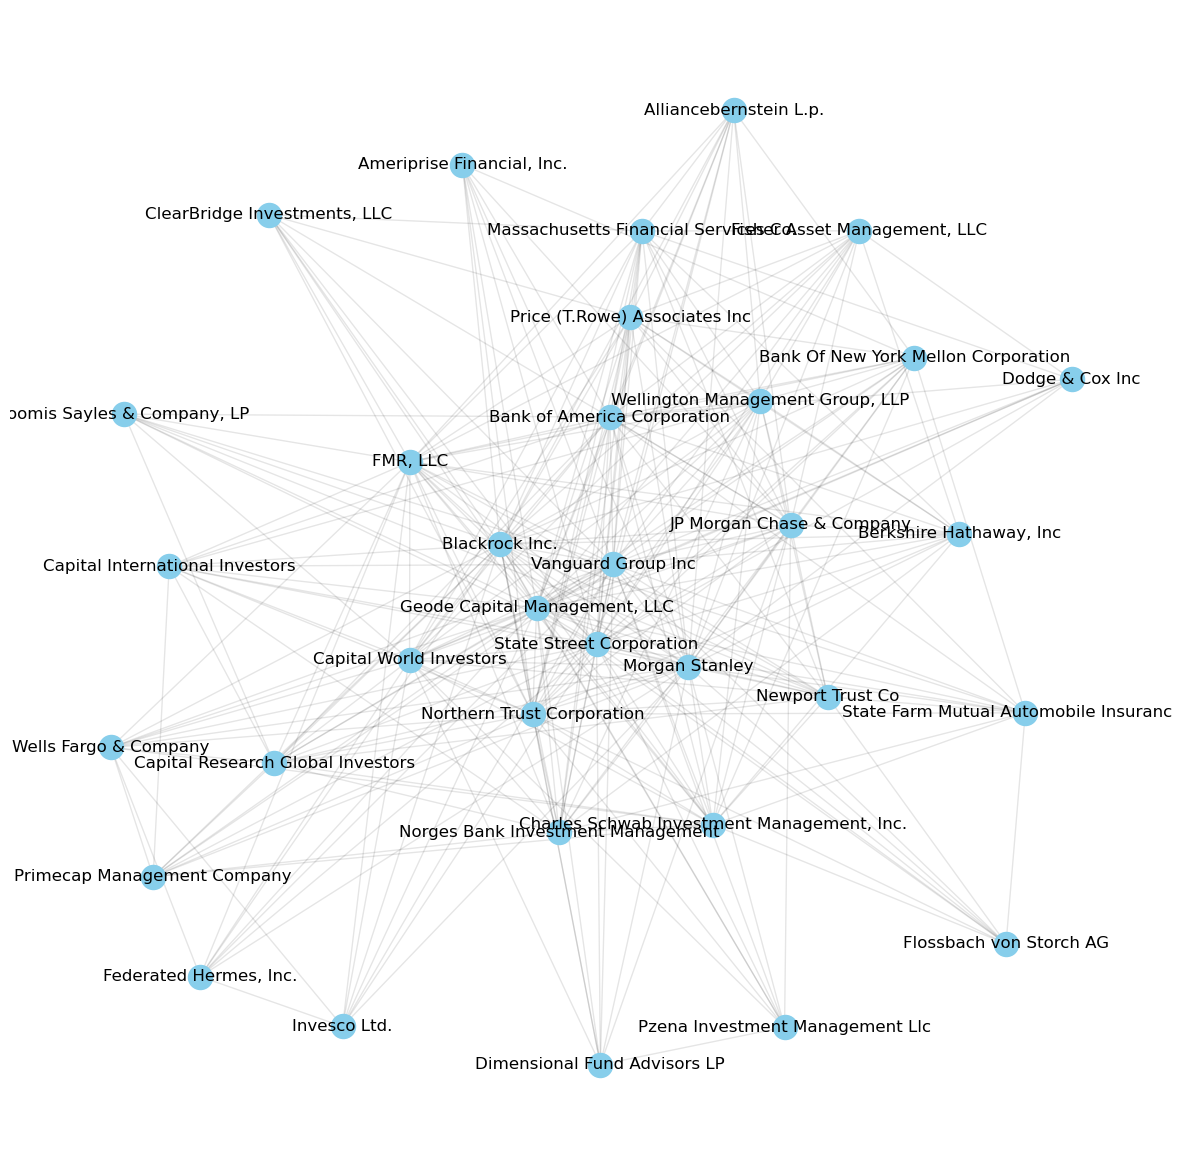

In [17]:
pos = nx.fruchterman_reingold_layout(holder_graph);

plt.figure(figsize=(15,15));
plt.axis("off");
nx.draw_networkx_nodes(holder_graph, pos, node_size=300, node_color="skyblue");
nx.draw_networkx_edges(holder_graph, pos, alpha=0.1);
nx.draw_networkx_labels(holder_graph, pos, font_color='black');
plt.show();

In [18]:
N_holder = holder_graph.order()
L_holder = holder_graph.size() 

avg_deg_holder = float(L_holder) / N_holder 

print ('Nodes of the holder network: ', N_holder)
print ('Edges of the holder network: ', L_holder)
print ('Average degree of the holder network: ', avg_deg_holder)

Nodes of the holder network:  34
Edges of the holder network:  302
Average degree of the holder network:  8.882352941176471


The average degree of 8.88 reflects the potential for influence and information flow between holders. Holders with higher degrees may have a more significant impact on investment trends or be crucial sources of information dissemination within the holder community.

In [19]:
cc_holder = nx.clustering(holder_graph)
avg_clust_holder = sum(cc_holder.values()) / len(cc_holder)
print(avg_clust_holder)

0.8221227050138129


the average clustering coefficient of 0.8221227050138129 suggests a highly clustered and well-structured holder network, with holders forming cohesive groups and potential investment communities. This is to be expected since we are working with the group of holders that has shares for companies under the DJIA index.

For individuals with little to no experience in investing, our objective is to identify investors whose investment portfolios can be deemed relatively safe to replicate. To assess this level of safety, we will employ centrality metrics that can help gauge the stability and influence of these investors within the network. To read more about the different centrality measures, please visit this [documentation](https://networkx.org/documentation/stable/reference/algorithms/centrality.html).

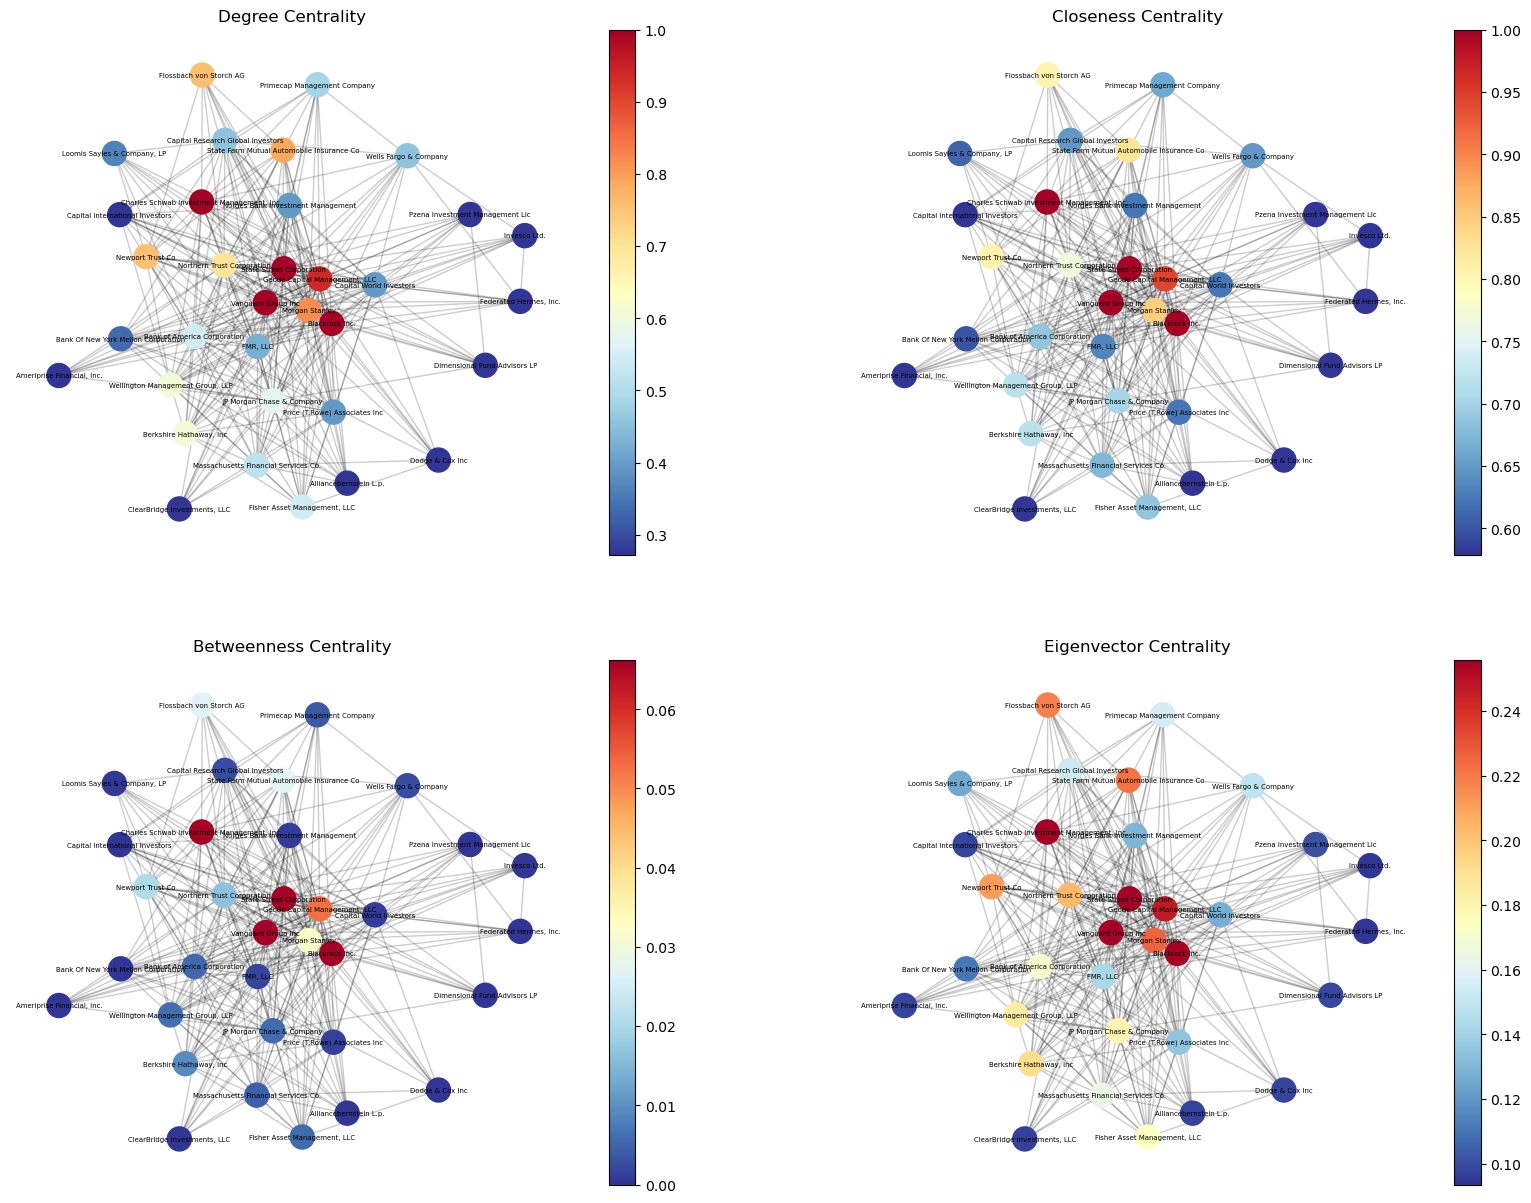

In [20]:
fig = plt.figure(figsize=(20, 15))

centralities = {
    'Degree Centrality': nx.degree_centrality(holder_graph),
    'Closeness Centrality': nx.closeness_centrality(holder_graph),
    'Betweenness Centrality': nx.betweenness_centrality(holder_graph),
    'Eigenvector Centrality': nx.eigenvector_centrality(holder_graph)
}

sorted_centralities = {centrality: sorted(values.items(), key=lambda x: x[1], reverse=True)
                       for centrality, values in centralities.items()}

df_centralities = pd.DataFrame(sorted_centralities)

pos = nx.spring_layout(holder_graph)

for i, (centrality, values) in enumerate(sorted_centralities.items()):
    ax = fig.add_subplot(2, 2, i+1)
    nc = nx.draw_networkx_nodes(holder_graph, pos, node_size=300, cmap=plt.cm.RdYlBu_r,
                                node_color=[v[1] for v in values])
    nx.draw_networkx_edges(holder_graph, pos, alpha=0.2)
    nx.draw_networkx_labels(holder_graph, pos, font_color='black', font_size=5)
    plt.title(centrality)
    plt.axis('off')
    plt.colorbar(nc)

plt.show()

In [21]:
display(df_centralities.head(10))

,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality
0,"(Vanguard Group Inc, 1.0)","(Vanguard Group Inc, 1.0)","(Vanguard Group Inc, 0.06628713773600138)","(Vanguard Group Inc, 0.25597912134894707)"
1,"(Blackrock Inc., 1.0)","(Blackrock Inc., 1.0)","(Blackrock Inc., 0.06628713773600138)","(Blackrock Inc., 0.25597912134894707)"
2,"(State Street Corporation, 1.0)","(State Street Corporation, 1.0)","(State Street Corporation, 0.06628713773600138)","(State Street Corporation, 0.25597912134894707)"
3,"(Geode Capital Management, LLC, 1.0)","(Geode Capital Management, LLC, 1.0)","(Geode Capital Management, LLC, 0.066287137736...","(Geode Capital Management, LLC, 0.255979121348..."
4,"(Morgan Stanley, 0.9393939393939394)","(Morgan Stanley, 0.9428571428571428)","(Morgan Stanley, 0.05256810214196578)","(Morgan Stanley, 0.246903293798499)"
5,"(Northern Trust Corporation, 0.8181818181818182)","(Northern Trust Corporation, 0.8461538461538461)","(Northern Trust Corporation, 0.03170673497378043)","(Northern Trust Corporation, 0.22576538341577712)"
6,"(FMR, LLC, 0.7878787878787878)","(FMR, LLC, 0.825)","(Capital World Investors, 0.027045471363653182)","(FMR, LLC, 0.22208435563089624)"
7,"(Bank of America Corporation, 0.7575757575757576)","(Bank of America Corporation, 0.8048780487804879)","(FMR, LLC, 0.026801302653575377)","(Bank of America Corporation, 0.21826122958661..."
8,"(Capital World Investors, 0.7575757575757576)","(Capital World Investors, 0.8048780487804879)","(Bank of America Corporation, 0.02058211674688...","(Capital World Investors, 0.21115935103668265)"
9,"(JP Morgan Chase & Company, 0.696969696969697)","(JP Morgan Chase & Company, 0.7674418604651163)","(JP Morgan Chase & Company, 0.016409395528713712)","(JP Morgan Chase & Company, 0.20348404082325802)"


The choice of centrality measure is of paramount importance when seeking to capture the concept of "safeness" while replicating investment portfolios within the network. Each centrality measure provides unique and valuable insights into the positioning and influence of individual nodes (investors) in the network. Let's explore each measure and its relevance to the notion of "safeness":

`Degree Centrality`: Degree centrality quantifies the number of connections (edges) that a node (investor) has in the network. A higher degree centrality indicates that an investor is well-connected and has invested in a larger number of companies or holds a diversified range of assets. In the context of "safeness," a higher degree centrality implies potential stability and safety, as it suggests that the investor's portfolio is well-spread across multiple investments, thereby potentially reducing vulnerability to fluctuations in individual assets.

`Betweenness Centrality`: Betweenness centrality measures a node's significance as a bridge or intermediary along the shortest paths between other nodes in the network. High betweenness centrality suggests that an investor plays a pivotal role in connecting different parts of the network. From the perspective of "safeness," high betweenness centrality may indicate that the investor's portfolio wields a considerable influence on the overall market dynamics, potentially contributing to greater stability due to their strategic position.

`Closeness Centrality`: Closeness centrality assesses how closely connected a node (investor) is to all other nodes in the network, taking into account the shortest paths. A higher closeness centrality indicates that an investor can access and disseminate information quickly within the network. For "safeness," higher closeness centrality may suggest that the investor has better access to timely and critical information, enabling them to make more informed and potentially safer investment decisions.

`Eigenvector Centrality`: Eigenvector centrality evaluates a node's importance based on its connections to other highly connected nodes in the network. Nodes with high eigenvector centrality are connected to other influential nodes, which, in turn, enhances their own significance. Regarding "safeness," high eigenvector centrality implies that the investor is connected to reputable and influential investors, indicating a potentially more reliable and secure investment strategy.

As someone that has little background to finance, being able to leverage the power of network analysis in crafting a possible investing strategy using the different centrality measures can give me an edge than those that are blindly going into the market.

Please do note that I am not a licensed financial advisor and that all findings are limited to the top 10 holders of each company within DJIA. The last update of the data used is March 30, 2023. This is for educational purposes only and a demonstration of network analysis in the field of finance.